In [177]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import matplotlib.pyplot as plt
from scipy import stats

In [178]:
energy_df = pd.read_csv("..\Downloads\cleaned_data.csv")

In [186]:
energy_df

,Unnamed: 0,Country Name,Year,Renewables Value,Renewables Share,Non-Renewables Value,Non-Renewables Share,CO2 Emissions,Particulate Matter,Respiratory Death Rate
0,0,Argentina,2015,33567.573000,0.247105,1.040233e+05,0.752895,1.917438e+08,13.940,34.86
1,1,Argentina,2016,31013.883000,0.213672,1.081583e+05,0.786328,1.899204e+08,13.690,35.81
2,2,Argentina,2017,33292.217000,0.249992,1.046230e+05,0.750008,1.868989e+08,13.008,35.94
3,3,Argentina,2018,34652.219560,0.324108,1.045359e+05,0.675892,1.805993e+08,12.384,35.09
4,4,Argentina,2019,34524.081521,0.275338,9.793823e+04,0.724662,1.785116e+08,11.832,34.85
...,...,...,...,...,...,...,...,...,...,...
346,346,United States,2015,576983.186000,0.166262,3.532236e+06,0.833738,5.376578e+09,8.250,38.06
347,347,United States,2016,647498.933000,0.165450,3.471946e+06,0.834550,5.251758e+09,7.482,38.01
348,348,United States,2017,728586.908000,0.165288,3.357416e+06,0.834712,5.210957e+09,7.894,37.32
349,349,United States,2018,750808.075112,0.177603,3.486119e+06,0.822397,5.376657e+09,8.074,37.57


In [187]:
energy_sum_df = energy_df.drop(columns = ["Renewables Value", "Respiratory Death Rate", "CO2 Emissions", "Particulate Matter", "Unnamed: 0", "Year", "Non-Renewables Value"])

In [188]:
energy_sum_df

,Country Name,Renewables Share,Non-Renewables Share
0,Argentina,0.247105,0.752895
1,Argentina,0.213672,0.786328
2,Argentina,0.249992,0.750008
3,Argentina,0.324108,0.675892
4,Argentina,0.275338,0.724662
...,...,...,...
346,United States,0.166262,0.833738
347,United States,0.165450,0.834550
348,United States,0.165288,0.834712
349,United States,0.177603,0.822397


In [189]:
Avg_Energy_DF = energy_sum_df.groupby('Country Name').mean()

In [190]:
Avg_Energy_DF

,Renewables Share,Non-Renewables Share
Country Name,,
Argentina,0.262043,0.737957
Australia,0.161845,0.838155
Austria,0.654334,0.345666
Belgium,0.185600,0.814400
Brazil,0.816186,0.183814
Bulgaria,0.144830,0.855170
Canada,0.671283,0.328717
Chile,0.487493,0.512507
Colombia,0.699123,0.300876


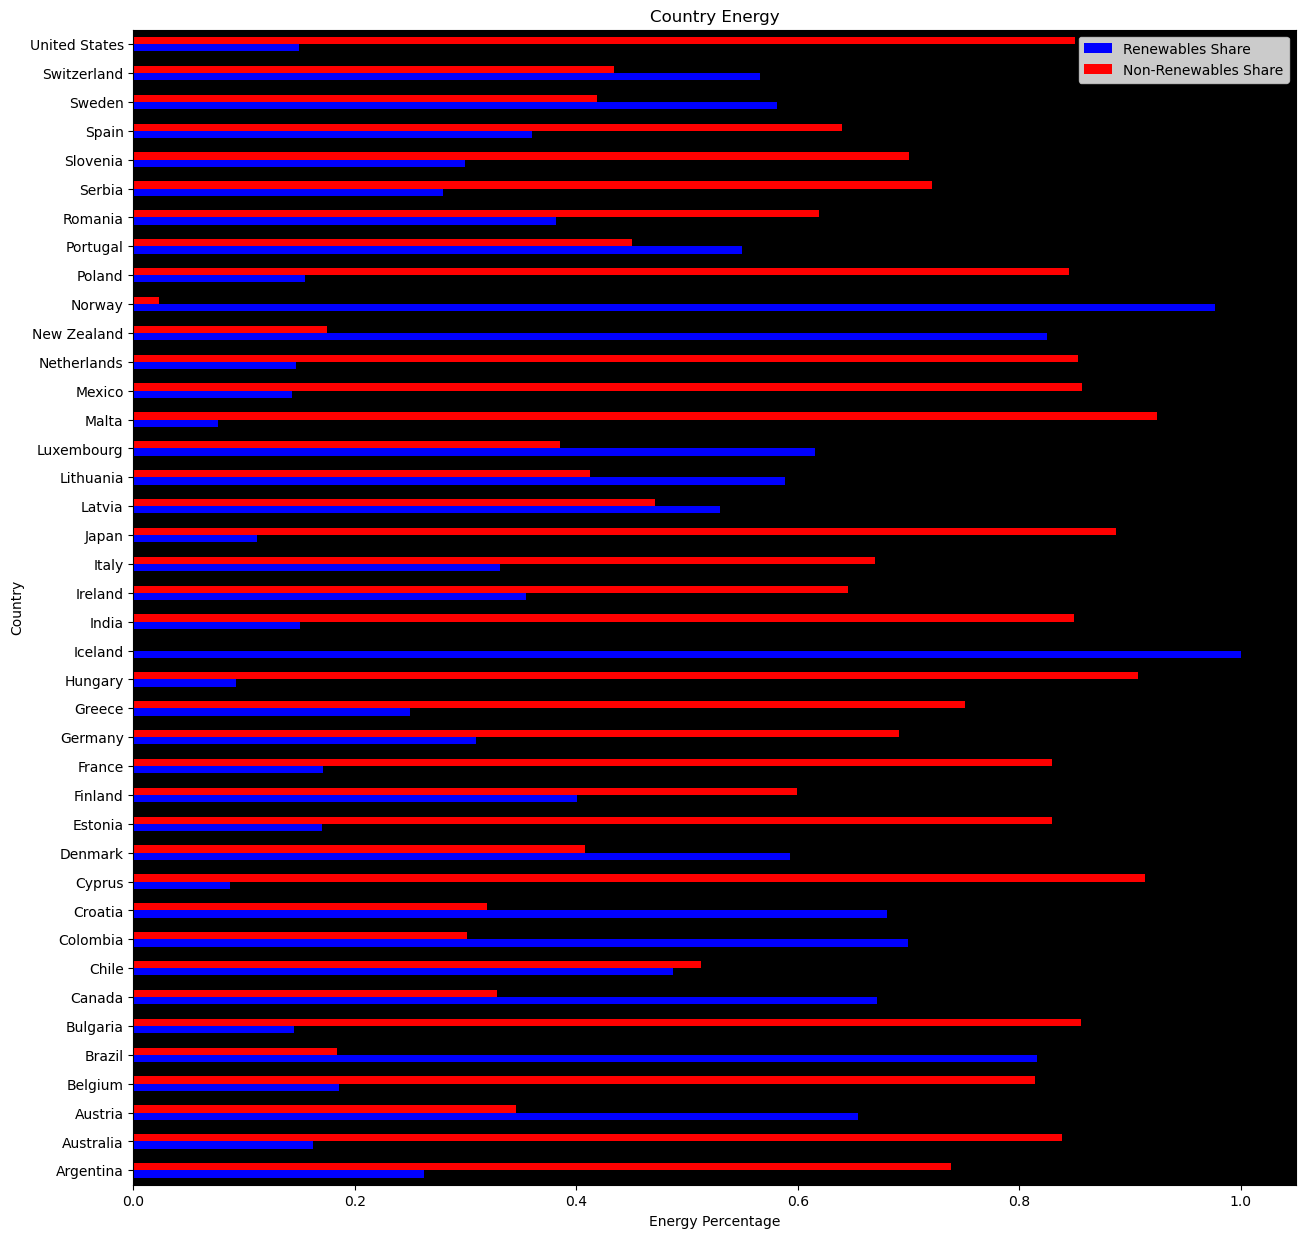

In [250]:
colors = ['blue', 'red']
energybar = Avg_Energy_DF.plot.barh(figsize = (15,15), color = colors )
energybar.set_title('Country Energy')
energybar.set_xlabel('Energy Percentage')
energybar.set_ylabel('Country')
energybar.set_facecolor('#000000')

In [208]:
Renewables_DF = Avg_Energy_DF.drop(columns = "Non-Renewables Share")

In [209]:
Renewables_DF

,Renewables Share
Country Name,
Argentina,0.262043
Australia,0.161845
Austria,0.654334
Belgium,0.185600
Brazil,0.816186
Bulgaria,0.144830
Canada,0.671283
Chile,0.487493
Colombia,0.699123


In [236]:
Top_Renew_DF = Renewables_DF.sort_values(by = "Renewables Share", ascending = False)
Best_Energy = 5
Best_Renew_DF = Top_Renew_DF.head(Best_Energy)

In [237]:
Best_Renew_DF

,Renewables Share
Country Name,
Iceland,0.999654
Norway,0.976978
New Zealand,0.824943
Brazil,0.816186
Colombia,0.699123


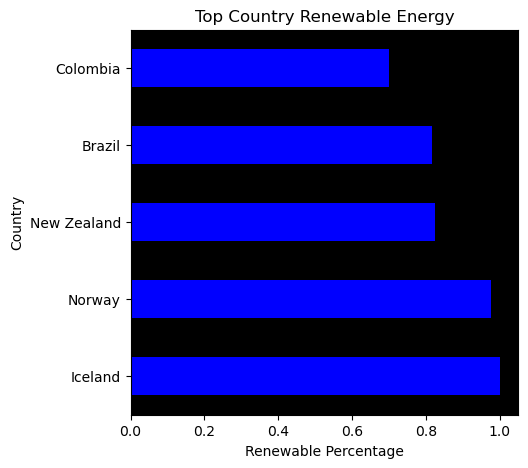

In [251]:
colors = ['blue']
energybar2 = Best_Renew_DF.plot.barh(figsize = (5,5), color = colors, legend = False )
energybar2.set_title("Top Country Renewable Energy")
energybar2.set_xlabel('Renewable Percentage')
energybar2.set_ylabel('Country')
energybar2.set_facecolor('#000000')

In [222]:
NonRenewables_DF = Avg_Energy_DF.drop(columns = "Renewables Share")

In [223]:
NonRenewables_DF

,Non-Renewables Share
Country Name,
Argentina,0.737957
Australia,0.838155
Austria,0.345666
Belgium,0.814400
Brazil,0.183814
Bulgaria,0.855170
Canada,0.328717
Chile,0.512507
Colombia,0.300876


In [243]:
Top_NonRenew_DF = NonRenewables_DF.sort_values(by = "Non-Renewables Share", ascending = False)
Best_Energy = 5
Best_NonRenew_DF = Top_NonRenew_DF.head(Best_Energy)

In [244]:
Best_NonRenew_DF

,Non-Renewables Share
Country Name,
Malta,0.924554
Cyprus,0.912946
Hungary,0.907510
Japan,0.887427
Mexico,0.856351


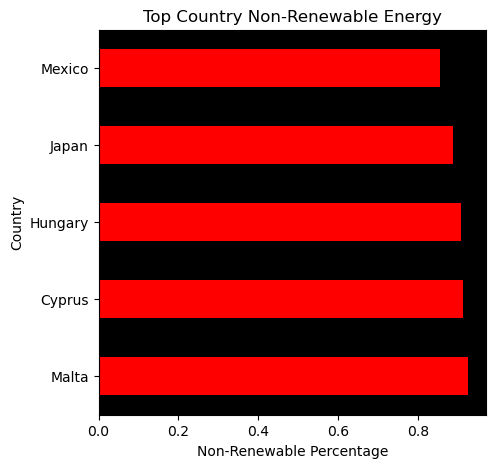

In [249]:
colors = ['red']
energybar3 = Best_NonRenew_DF.plot.barh(figsize = (5,5), color = colors, legend = False )
energybar3.set_title("Top Country Non-Renewable Energy")
energybar3.set_xlabel('Non-Renewable Percentage')
energybar3.set_ylabel('Country')
energybar3.set_facecolor('#000000')

In [261]:
Pollution_df = energy_df.drop(columns = ["Renewables Value",  "CO2 Emissions", "Unnamed: 0", "Year", "Non-Renewables Value", "Renewables Share", "Non-Renewables Share"])

In [262]:
Pollution_df

,Country Name,Particulate Matter,Respiratory Death Rate
0,Argentina,13.940,34.86
1,Argentina,13.690,35.81
2,Argentina,13.008,35.94
3,Argentina,12.384,35.09
4,Argentina,11.832,34.85
...,...,...,...
346,United States,8.250,38.06
347,United States,7.482,38.01
348,United States,7.894,37.32
349,United States,8.074,37.57


In [263]:
Avg_Pollution_df = Pollution_df.groupby('Country Name').mean()

In [266]:
Matter_df = Avg_Pollution_df.drop(columns = "Respiratory Death Rate")

In [267]:
Matter_df

,Particulate Matter
Country Name,
Argentina,12.970800
Australia,7.404200
Austria,13.855800
Belgium,13.553400
Brazil,11.956000
Bulgaria,20.324400
Canada,7.043600
Chile,22.893000
Colombia,16.313333


In [291]:
Death_df = Avg_Pollution_df.drop(columns = "Particulate Matter")

In [292]:
Death_df

,Respiratory Death Rate
Country Name,
Argentina,35.310000
Australia,24.296000
Austria,17.362000
Belgium,28.349000
Brazil,34.858000
Bulgaria,20.336000
Canada,24.175000
Chile,28.599000
Colombia,32.386667


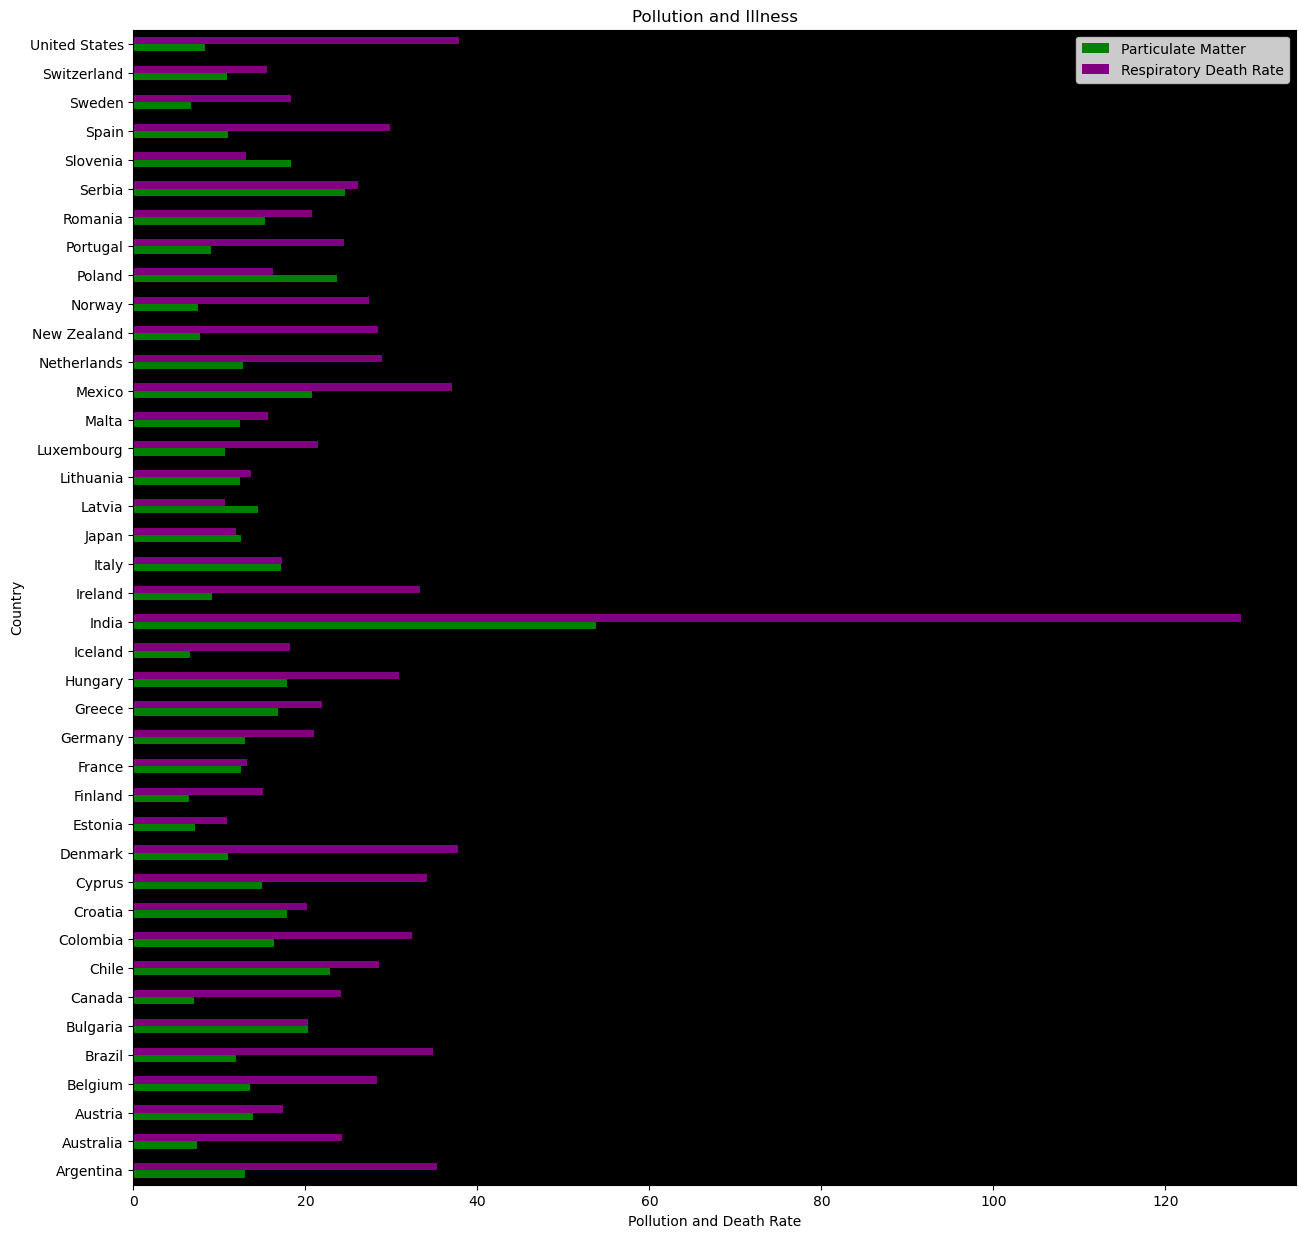

In [284]:
colors = ['green', 'purple']
ProblemBar = Avg_Pollution_df.plot.barh(figsize = (15,15), color = colors )
ProblemBar.set_title('Pollution and Illness')
ProblemBar.set_xlabel('Pollution and Death Rate')
ProblemBar.set_ylabel('Country')
ProblemBar.set_facecolor('#000000')

In [285]:
Top_Matter_df = Matter_df.sort_values(by = "Particulate Matter", ascending = False)
Best_Pollution = 5
Best_Matter_df = Top_Matter_df.head(Best_Pollution)

In [286]:
Best_Matter_df

,Particulate Matter
Country Name,
India,53.8176
Serbia,24.6092
Poland,23.6630
Chile,22.8930
Mexico,20.8092


In [287]:
Top_death_df = Death_df.sort_values(by = "Respiratory Death Rate", ascending = False)
Best_Death = 5
Best_Death_df = Top_death_df.head(Best_Death)

In [288]:
Best_Death_df

,Respiratory Death Rate
Country Name,
India,128.732
United States,37.834
Denmark,37.736
Mexico,37.046
Argentina,35.310


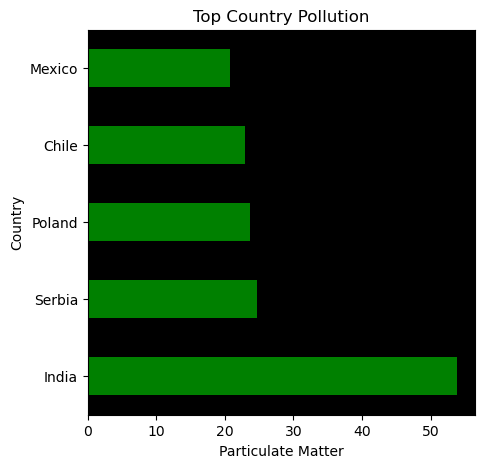

In [289]:
colors = ['green']
matterbar = Best_Matter_df.plot.barh(figsize = (5,5), color = colors, legend = False )
matterbar.set_title("Top Country Pollution")
matterbar.set_xlabel('Particulate Matter')
matterbar.set_ylabel('Country')
matterbar.set_facecolor('#000000')

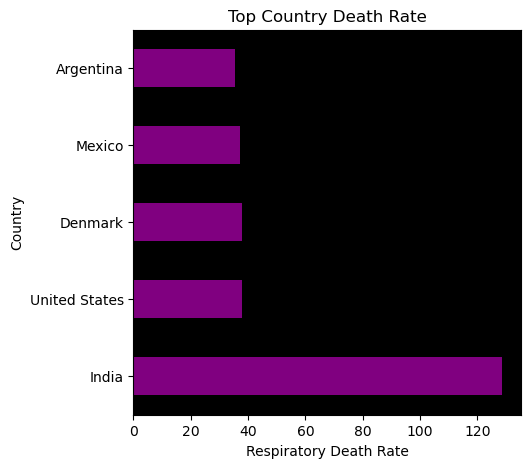

In [290]:
colors = ['purple']
deathbar = Best_Death_df.plot.barh(figsize = (5,5), color = colors, legend = False )
deathbar.set_title("Top Country Death Rate")
deathbar.set_xlabel('Respiratory Death Rate')
deathbar.set_ylabel('Country')
deathbar.set_facecolor('#000000')

In [297]:
sample_A = Avg_Pollution_df['Particulate Matter'] 
sample_B = Avg_Pollution_df['Respiratory Death Rate'] 

In [298]:
t_stat, p_value = stats.ttest_ind(sample_A, sample_B)

In [299]:
print("t-statistic:", t_stat)
print("p-value:", p_value)

t-statistic: -3.726758973266543
p-value: 0.00036540618964292287
